In [35]:
import pandas as pd
from functools import reduce
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(np.__version__)

new_directory = "directory_for_data"

# Change the current working directory
os.chdir(new_directory)

# Confirm the change by printing the current working directory
print("Current working directory:", os.getcwd())

1.26.4
Current working directory: /Users/main/grad_school/social_datasci_term1/assessment/dataforcleaning


In [36]:
def remove_margin_of_error_columns(df):
    # Keep only columns that do not contain "margin of error" (case insensitive)
    return df.loc[:, ~df.columns.str.contains("Margin of Error", case=False)]

def remove_column_from_dfs(df_list, column_name):
    updated_dfs = []
    for df in df_list:
        if column_name in df.columns:
            df = df.drop(columns=[column_name])
        updated_dfs.append(df)
    return updated_dfs

def merge_dataframes_on_column(dfs, on_column):
    return reduce(lambda left, right: pd.merge(left, right, on=on_column, how="inner"), dfs)

def remove_exclam(df):
    df.columns = df.columns.str.replace(r"!!", "", regex=True)
    return df

def filter_csv_by_columns(df, columns_to_keep):
    filtered_df = df[columns_to_keep]
    return filtered_df

def convert_counts_to_percentages(df, count_columns, total_column):
   for col in count_columns:
       df[col] = np.where(df[total_column] == 0, np.nan, (df[col] / df[total_column]) * 100)
   return df
   
def sum_cols(df, cols_to_sum, new_col_name):
    df[new_col_name] = df[cols_to_sum].sum(axis=1)
    return df


In [37]:
# Load CSV files
df1 = pd.read_csv("AgeRace.csv", skiprows=1)
df2 = pd.read_csv("Income.csv", skiprows=1)
df3 = pd.read_csv("Unit_Count.csv", skiprows=1)
df4 = pd.read_csv("Vacancy.csv", skiprows=1)
df5 = pd.read_csv("Median_Rent.csv", skiprows=1)
df6 = pd.read_csv("Race.csv", skiprows=1)
df7 = pd.read_csv("Poverty.csv", skiprows=1)

dfs = [df1, df2, df3, df4, df5, df6, df7]

dfs = [df.iloc[1:] for df in dfs]

dfs = remove_column_from_dfs(dfs, "Geography")

df = merge_dataframes_on_column(dfs, "Geographic Area Name")

df = remove_margin_of_error_columns(df)

df = remove_exclam(df)

print(len(df.columns))
# Save the result
df.to_csv("test_file.csv", index=False)

274


In [38]:
want_cols = [
    "Geographic Area Name",
    "EstimateSEX AND AGETotal population",	
    "PercentSEX AND AGETotal populationMale",	
    "PercentSEX AND AGETotal populationFemale",	
    "PercentSEX AND AGETotal populationUnder 5 years",	
    "PercentSEX AND AGETotal population5 to 9 years",	
    "PercentSEX AND AGETotal population10 to 14 years",	
    "PercentSEX AND AGETotal population15 to 19 years",	
    "PercentSEX AND AGETotal population20 to 24 years",	
    "PercentSEX AND AGETotal population25 to 34 years",	
    "PercentSEX AND AGETotal population35 to 44 years",	
    "PercentSEX AND AGETotal population45 to 54 years",	
    "PercentSEX AND AGETotal population55 to 59 years",	
    "PercentSEX AND AGETotal population60 to 64 years",	
    "PercentSEX AND AGETotal population65 to 74 years",	
    "PercentSEX AND AGETotal population75 to 84 years",	
    "PercentSEX AND AGETotal population85 years and over",	
    "EstimateHouseholdsTotal",
    "EstimateHouseholdsTotalLess than $10,000",	
    "EstimateHouseholdsTotal$10,000 to $14,999",	
    "EstimateHouseholdsTotal$15,000 to $24,999",
    "EstimateHouseholdsTotal$25,000 to $34,999",	
    "EstimateHouseholdsTotal$35,000 to $49,999",	
    "EstimateHouseholdsTotal$50,000 to $74,999",	
    "EstimateHouseholdsTotal$75,000 to $99,999",	
    "EstimateHouseholdsTotal$100,000 to $149,999",	
    "EstimateHouseholdsTotal$150,000 to $199,999",	
    "EstimateHouseholdsTotal$200,000 or more",	
    "EstimateHouseholdsMedian income (dollars)",	
    "EstimateHouseholdsMean income (dollars)",	 
    " Total",	 
    " Total:",	
    "EstimateMedian contract rent",	
    "EstimateTotal:",	
    "EstimateTotal:White alone",	
    "EstimateTotal:Black or African American alone",	
    "EstimateTotal:American Indian and Alaska Native alone",	
    "EstimateTotal:Asian alone",	
    "EstimateTotal:Native Hawaiian and Other Pacific Islander alone",	
    "EstimateTotal:Some Other Race alone",	
    "EstimateTotal:Two or More Races:",	
    "EstimateTotal:Two or More Races:Two races including Some Other Race",	
    "EstimateTotal:Two or More Races:Two races excluding Some Other Race, and three or more races",	
    "EstimatePercent below poverty levelPopulation for whom poverty status is determined"
]

In [39]:
# Load the CSV, skipping the first row
df = pd.read_csv('test_file.csv')

df = filter_csv_by_columns(df, want_cols)

excluded_columns = [
    "EstimateTotal:Black or African American alone", 
    "EstimateTotal:Asian alone",
    "EstimateTotal:American Indian and Alaska Native alone",
    "EstimateTotal:Native Hawaiian and Other Pacific Islander alone",                                
    "EstimateTotal:Some Other Race alone",                                                             
    "EstimateTotal:Two or More Races:",                                                                
    "EstimateTotal:Two or More Races:Two races including Some Other Race",                              
    "EstimateTotal:Two or More Races:Two races excluding Some Other Race, and three or more races"
    ]

columns_to_modify = df.columns.difference(excluded_columns)

df[columns_to_modify] = df[columns_to_modify].replace("-", 0)

df[columns_to_modify] = df[columns_to_modify].replace(0, np.nan)

print(df.shape)

df = df.dropna(subset=['EstimateSEX AND AGETotal population', 'EstimateMedian contract rent', 'EstimateHouseholdsMean income (dollars)', 'EstimateHouseholdsMedian income (dollars)'])

print(df.isna().sum())

print(df.shape)

(309, 44)
Geographic Area Name                                                                            0
EstimateSEX AND AGETotal population                                                             0
PercentSEX AND AGETotal populationMale                                                          0
PercentSEX AND AGETotal populationFemale                                                        0
PercentSEX AND AGETotal populationUnder 5 years                                                 0
PercentSEX AND AGETotal population5 to 9 years                                                  0
PercentSEX AND AGETotal population10 to 14 years                                                0
PercentSEX AND AGETotal population15 to 19 years                                                0
PercentSEX AND AGETotal population20 to 24 years                                                0
PercentSEX AND AGETotal population25 to 34 years                                                0
PercentSEX

In [40]:
percentcols=[
    "EstimateTotal:White alone",	
    "EstimateTotal:Black or African American alone",	
    "EstimateTotal:American Indian and Alaska Native alone",	
    "EstimateTotal:Asian alone",	
    "EstimateTotal:Native Hawaiian and Other Pacific Islander alone",	
    "EstimateTotal:Some Other Race alone",	
    "EstimateTotal:Two or More Races:",	
    "EstimateTotal:Two or More Races:Two races including Some Other Race",	
    "EstimateTotal:Two or More Races:Two races excluding Some Other Race, and three or more races"
]    

total_col="EstimateTotal:"

df = convert_counts_to_percentages(df, percentcols, total_col)

In [41]:
new_cols = [
    "Census Tract",
    "Total Population Count",	
    "Percent Male",	
    "Percent Female",	
    "Percent Under 5 years",	
    "Percent 5 to 9 years",	
    "Percent 10 to 14 years",	
    "Percent 15 to 19 years",	
    "Percent 20 to 24 years",	
    "Percent 25 to 34 years",	
    "Percent 35 to 44 years",	
    "Percent 45 to 54 years",	
    "Percent 55 to 59 years",	
    "Percent 60 to 64 years",	
    "Percent 65 to 74 years",	
    "Percent 75 to 84 years",	
    "Percent 85 years and over",	
    "Total Households Count",
    "Less than $10,000",	
    "$10,000 to $14,999",	
    "$15,000 to $24,999",
    "$25,000 to $34,999",	
    "$35,000 to $49,999",	
    "$50,000 to $74,999",	
    "$75,000 to $99,999",	
    "$100,000 to $149,999",	
    "$150,000 to $199,999",	
    "$200,000 or more",	
    "Households Median income (dollars)",	
    "Household Mean income (dollars)",	 
    "Total Units",	 
    "Total Vacant Units",	
    "Median Contract Rent",	
    "Total POP Race",	
    "White alone",	
    "Black or African American alone",	
    "American Indian and Alaska Native alone",	
    "Asian alone",	
    "Native Hawaiian and Other Pacific Islander alone",	
    "Some Other Race alone",	
    "Two or More Races:",	
    "Two or More Races:Two races including Some Other Race",	
    "Two or More Races:Two races excluding Some Other Race, and three or more races",	
    "Percent Below Poverty"
]

df.columns = new_cols

In [42]:
df['Census Tract'] = df['Census Tract'].str.split(';').str[0].str.extract(r'(\d+\.?\d*)')


In [43]:
evict_cols_keep = [
    "CTLabel",		
    "NTAName",	
    "NUMPOINTS",
    "2023_evict",
    "2024_evict"
]

evict_cols_new = [
    "Census Tract",		
    "NTAName",	
    "311 Housing Count",
    "2023_evict Count",
    "2024_evict Count"
]
df_evict = pd.read_csv("Census_Tract_311_Evictions.csv")

df_evict = filter_csv_by_columns(df_evict, evict_cols_keep)
df_evict.columns = evict_cols_new

df_evict["Census Tract"]= df["Census Tract"].astype(str)


In [44]:
df_evict.head()

,Census Tract,NTAName,311 Housing Count,2023_evict Count,2024_evict Count
0,2.01,Lower East Side,4.0,1.0,0.0
1,2.02,Lower East Side,272.0,5.0,7.0
2,NaN,Lower East Side,834.0,11.0,9.0
3,6,Lower East Side,277.0,6.0,1.0
4,7,East Village,320.0,0.0,1.0


In [45]:
dfs_to_merge = [df_evict, df]

evict_and_demo = merge_dataframes_on_column(dfs_to_merge, "Census Tract")

evict_and_demo['Median Contract Rent'] = evict_and_demo['Median Contract Rent'].str.replace('3,500+', '3500')
evict_and_demo['Households Median income (dollars)'] = evict_and_demo['Households Median income (dollars)'].str.replace('250,000+', '250000')
print(len(evict_and_demo.columns))

# Convert multiple columns to specific types
evict_and_demo = evict_and_demo.astype({
    'Census Tract': object,
    'NTAName': object,
    '311 Housing Count':int,
    '2023_evict Count':int,
    '2024_evict Count':int,
    'Total Population Count':float,
    'Percent Male':float,
    'Percent Female':float,
    'Percent Under 5 years':float,
    'Percent 5 to 9 years':float,
    'Percent 10 to 14 years':float,
    'Percent 15 to 19 years':float,
    'Percent 20 to 24 years':float,
    'Percent 25 to 34 years':float,
    'Percent 35 to 44 years':float,
    'Percent 45 to 54 years':float,
    'Percent 55 to 59 years':float,
    'Percent 60 to 64 years':float,
    'Percent 65 to 74 years':float,
    'Percent 75 to 84 years':float,
    'Percent 85 years and over':float,
    'Total Households Count':float,
    'Less than $10,000':float,
    '$10,000 to $14,999':float,
    '$15,000 to $24,999':float,
    '$25,000 to $34,999':float,
    '$35,000 to $49,999':float,
    '$50,000 to $74,999':float,
    '$75,000 to $99,999':float,
    '$100,000 to $149,999':float,
    '$150,000 to $199,999':float,
    '$200,000 or more':float,
    'Households Median income (dollars)':float,
    'Household Mean income (dollars)':float,
    'Total Units':float,
    'Total Vacant Units':float,
    'Median Contract Rent':float,
    'Total POP Race':float,
    'White alone':float,
    'Black or African American alone':float,
    'American Indian and Alaska Native alone':float,
    'Asian alone':float,
    'Native Hawaiian and Other Pacific Islander alone':float,
    'Some Other Race alone':float,
    'Two or More Races:':float,
    'Two or More Races:Two races including Some Other Race':float,
    'Two or More Races:Two races excluding Some Other Race, and three or more races':float,
    'Percent Below Poverty': float
    })

48


In [46]:
cols_to_sum = [
    "Percent 35 to 44 years",	
    "Percent 45 to 54 years",	
    "Percent 55 to 59 years",	
    "Percent 60 to 64 years",	
    "Percent 65 to 74 years",	
    "Percent 75 to 84 years",
]

evict_and_demo = sum_cols(evict_and_demo, cols_to_sum, "Percent Over 35")

print(evict_and_demo.dtypes)

evict_and_demo.to_csv("test_file_2.csv", index=False)

Census Tract                                                                       object
NTAName                                                                            object
311 Housing Count                                                                   int64
2023_evict Count                                                                    int64
2024_evict Count                                                                    int64
Total Population Count                                                            float64
Percent Male                                                                      float64
Percent Female                                                                    float64
Percent Under 5 years                                                             float64
Percent 5 to 9 years                                                              float64
Percent 10 to 14 years                                                            float64
Percent 15

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()

cols_to_standardize = ['Median Contract Rent', 'Households Median income (dollars)']

evict_and_demo[cols_to_standardize] = scaler.fit_transform(evict_and_demo[cols_to_standardize])

In [48]:
df = evict_and_demo

df['311 Housing Count Log'] = df['311 Housing Count'] + 1 
df['2023_evict Count Log'] = df['2023_evict Count'] + 1 
df['Total Units Log'] = df['Total Units'] + 1 
df['Total Vacant Units Log'] = df['Total Vacant Units'] + 1 

df['311 Housing Count Log'] = np.log(df['311 Housing Count Log'])
df['2023_evict Count Log'] = np.log(df['2023_evict Count Log'])
df['Total Units Log'] = np.log(df['Total Units'])
df['Total Vacant Units Log'] = np.log(df['Total Vacant Units'])

In [77]:
x_cols_log = [ 
    "311 Housing Count Log",	
    "Households Median income (dollars)",	 
    "Total Units Log",	 
    "Total Vacant Units Log",			
    "Black or African American alone",	
    "American Indian and Alaska Native alone",	
    "Asian alone",	
    "Native Hawaiian and Other Pacific Islander alone",	
    "Some Other Race alone",		
    "Percent Below Poverty"
]
test_vif = [
    "White alone",	
    "Total Population Count",	
    "Percent Male",	
    "Percent Female",
    "311 Housing Count",	
    "Households Median income (dollars)",	 
    "Total Units",	 
    "Total Vacant Units",			
    "Black or African American alone",	
    "American Indian and Alaska Native alone",	
    "Asian alone",	
    "Native Hawaiian and Other Pacific Islander alone",	
    "Some Other Race alone",		
    "Percent Below Poverty"
]

x_cols = [	
    "311 Housing Count",	
    "Households Median income (dollars)",	 
    "Total Units",	 
    "Total Vacant Units",			
    "Black or African American alone",	
    "American Indian and Alaska Native alone",	
    "Asian alone",	
    "Native Hawaiian and Other Pacific Islander alone",	
    "Some Other Race alone",		
    "Percent Below Poverty"
]

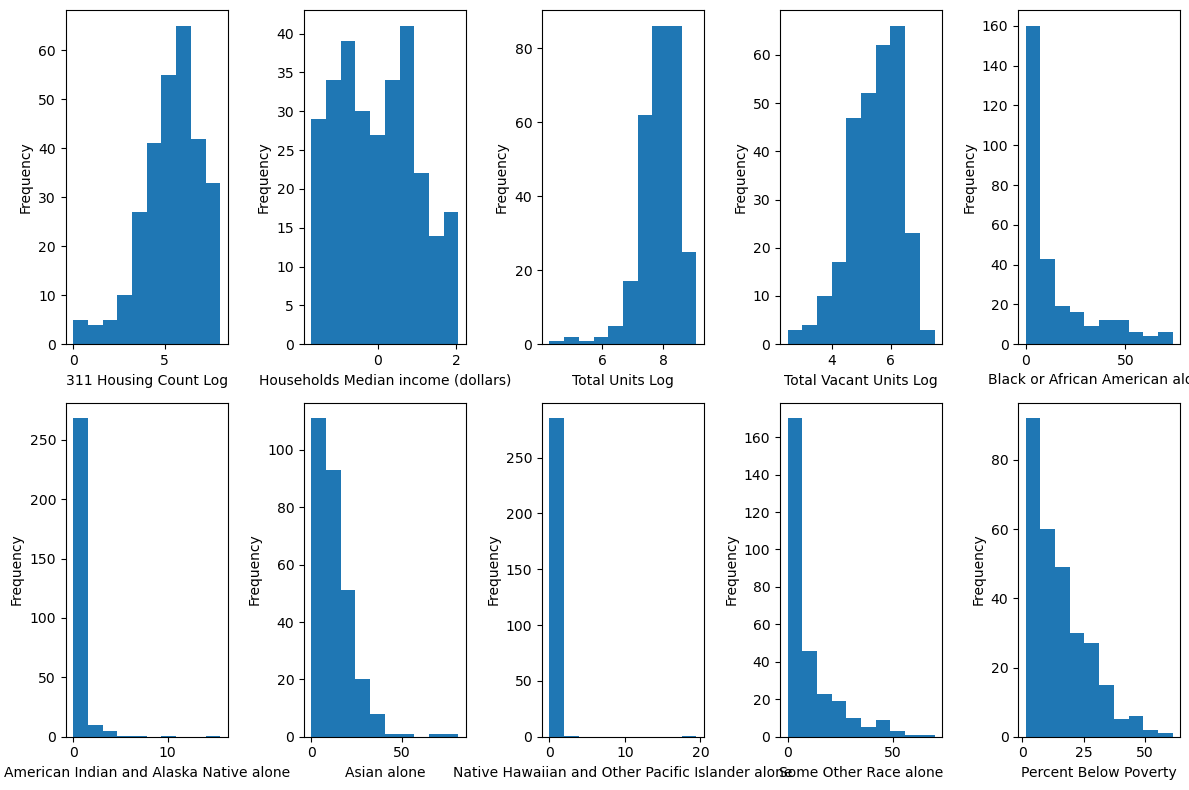

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(df[x_cols_log]):
    axes[i].hist(df[col], bins=10)  
    axes[i].set_title('')  
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


plt.tight_layout()

plt.show()

In [57]:
X = df[x_cols] 
y = df['2023_evict Count'] 

min_value = df['2023_evict Count'].min()
max_value = df['2023_evict Count'].max()
mean_value = df['2023_evict Count'].mean()
variance_value = df['2023_evict Count'].var()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")
print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")

# X = df[x_cols_log]
# y = df['2023_evict Count Log']

Minimum value: 0
Maximum value: 37
Mean: 7.048780487804878
Variance: 52.29131843765981


# Random Forest W/o Outliers

Average MSE across 10-folds: 13.886909346529729
Average MAE across 10-folds: 2.755694037930243
                                            Feature  Importance
0                                 311 Housing Count    0.762728
9                             Percent Below Poverty    0.049638
1                Households Median income (dollars)    0.044801
2                                       Total Units    0.039390
8                             Some Other Race alone    0.034253
3                                Total Vacant Units    0.022694
6                                       Asian alone    0.019838
4                   Black or African American alone    0.016709
5           American Indian and Alaska Native alone    0.009950
7  Native Hawaiian and Other Pacific Islander alone    0.000000


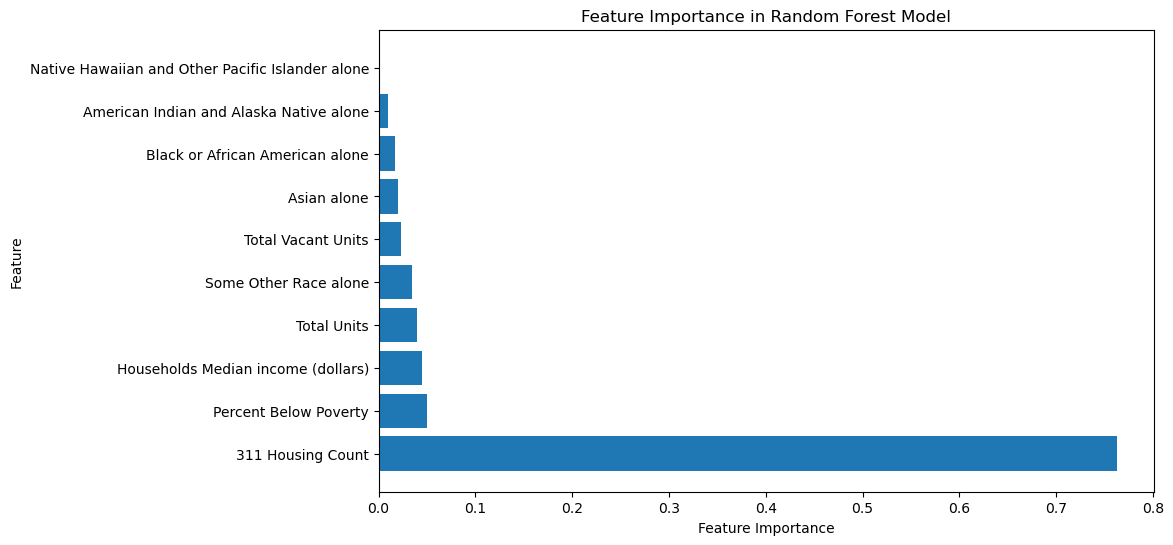

In [52]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


n_splits = 10


def detect_outliers_iqr(data):
    q1, q3 = data.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return ~((data >= lower_bound) & (data <= upper_bound))

outliers_df = df[x_cols].apply(detect_outliers_iqr)

rows_with_outliers = outliers_df.any(axis=1)


df_clean = df[~rows_with_outliers]


X = df_clean[x_cols]
y = df_clean['2023_evict Count']


kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 


mse_scores = []
mae_scores = []

param_grid = {
    'n_estimators': 100,  
    'max_depth': 15,   
    'min_samples_split': 10,
    'min_samples_leaf': 4 
}

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Random Forest Regressor model
    rf_model = RandomForestRegressor(**param_grid, random_state=42)  # Unpack hyperparameters
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate MSE and MAE
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)

# Calculate average MSE and MAE across all folds
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

print(f"Average MSE across {n_splits}-folds: {avg_mse}")
print(f"Average MAE across {n_splits}-folds: {avg_mae}")

# Calculate feature importance
feature_importance = rf_model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': x_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Visualize feature importance (optional)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Random Forest W/ Outliers

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 100}
37
                                            Feature  Importance
0                                 311 Housing Count    0.974492
5           American Indian and Alaska Native alone    0.004877
3                                Total Vacant Units    0.003505
9                             Percent Below Poverty    0.003378
1                Households Median income (dollars)    0.003335
8                             Some Other Race alone    0.003016
2                                       Total Units    0.002591
4                   Black or African American alone    0.002488
6                                       Asian alone    0.002318
7  Native Hawaiian and Other Pacific Islander alone    0.000000


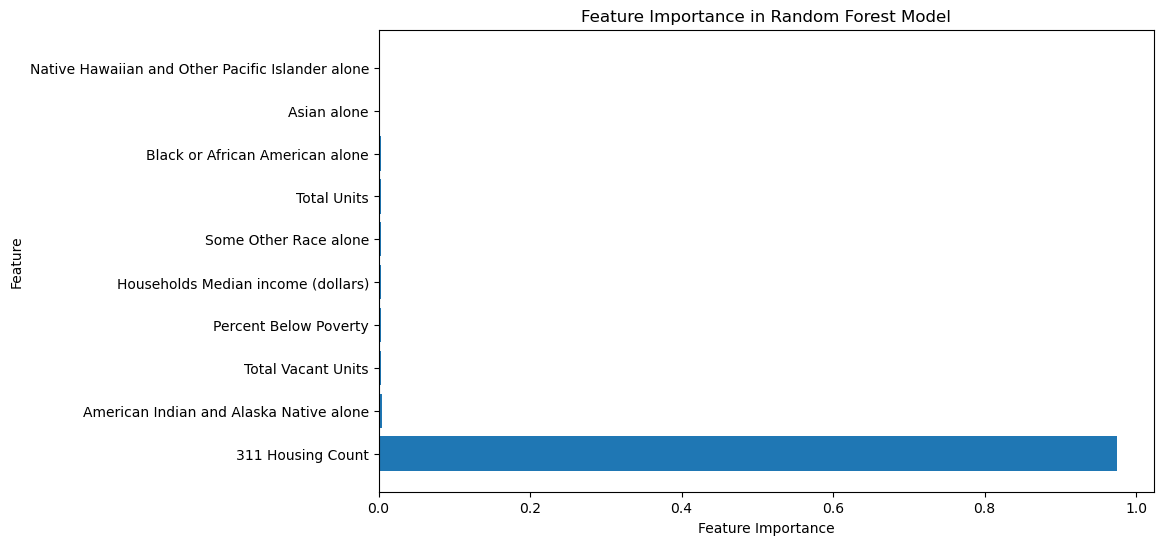

Random Forest Model Metrics:
Cross-Validated RMSE: 4.513189465493485
Cross-Validated MSE: 21.25008077292174
Cross-Validated MAE: 3.31583030527408
Cross-Validated R2: 0.5729292511365169
Cross-Validated LOG_LIKELIHOOD: -100.5578108428274
Cross-Validated AIC: 223.1156216856548
Cross-Validated BIC: 238.04007446012884


In [75]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from scipy import stats 


n_splits = 10


X = df[x_cols]
y = df['2023_evict Count']

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42) 

param_grid = {
'n_estimators': [100],
'max_depth': [5],
'min_samples_split': [10],
'min_samples_leaf': [20]
}
rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                          cv=kf, scoring='neg_mean_squared_error') 
grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X, y)
 
max_value = y.max()
print(max_value)


feature_importance = best_rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': x_cols, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()


best_model = grid_search.best_estimator_

def evaluate_model(model, X, y, kf):
    """Evaluates a model using cross-validation and returns various metrics."""

    rmse_scores = []
    mse_scores = []
    mae_scores = []
    r2_scores = []
    log_likelihoods = []
    aic_scores = []
    bic_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        mse = mean_squared_error(y_test, test_predictions)
        mae = mean_absolute_error(y_test, test_predictions)
        r2 = r2_score(y_test, test_predictions)

    
        log_likelihood = np.sum(stats.norm.logpdf(y_test, loc=np.mean(test_predictions), scale=np.std(test_predictions)))


        n = len(y_test)
        k = len(X.columns) + 1  
        aic = -2 * log_likelihood + 2 * k
        bic = -2 * log_likelihood + np.log(n) * k

        rmse_scores.append(rmse)
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)
        log_likelihoods.append(log_likelihood)
        aic_scores.append(aic)
        bic_scores.append(bic)

    return {
        "rmse": np.mean(rmse_scores),
        "mse": np.mean(mse_scores),
        "mae": np.mean(mae_scores),
        "r2": np.mean(r2_scores),
        "log_likelihood": np.mean(log_likelihoods),
        "aic": np.mean(aic_scores),
        "bic": np.mean(bic_scores),
    }
rf_metrics = evaluate_model(best_rf_model, X, y, kf)

print("Random Forest Model Metrics:")
for metric, value in rf_metrics.items():
    print(f"Cross-Validated {metric.upper()}: {value}")


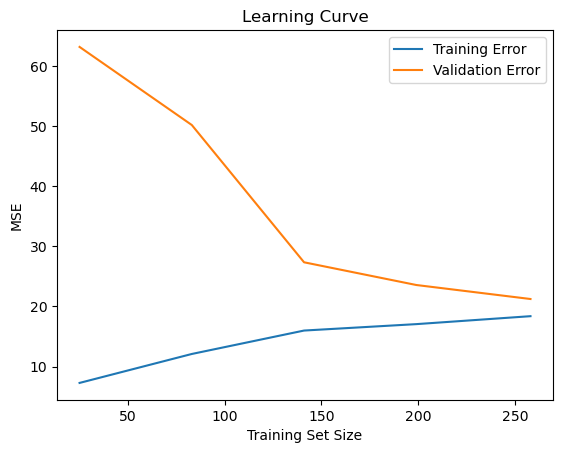

In [22]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model, X, y, cv=kf, scoring='neg_mean_squared_error'
)
train_errors = -np.mean(train_scores, axis=1)
val_errors = -np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, val_errors, label="Validation Error")
plt.legend()
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.title("Learning Curve")
plt.show()

# Baseline Models

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error


y_true = y


y_random = np.random.permutation(y_true)

mse_random = mean_squared_error(y_true, y_random)
print(f"Random Baseline MSE: {mse_random}")

Random Baseline MSE: 108.86411149825784


In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import norm #

def evaluate_naive_model(y_true):
    """Evaluates a naive model that always predicts the mean."""

    mean_target = np.mean(y_true)
    y_naive = np.full_like(y_true, mean_target)

    mse = mean_squared_error(y_true, y_naive)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_naive)

    log_likelihood = np.sum(norm.logpdf(y_true, loc=mean_target, scale=np.std(y_true)))

    n = len(y_true)
    k = 1  
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n) * k

    return {
        "rmse": rmse,
        "mse": mse,
        "mae": mae,
        "log_likelihood": log_likelihood,
        "aic": aic,
        "bic": bic,
    }

naive_metrics = evaluate_naive_model(y)

print("Naive Model Metrics:")
for metric, value in naive_metrics.items():
    print(f"{metric.upper()}: {value}")


Naive Model Metrics:
RMSE: 7.218829424348502
MSE: 52.11149825783972
MAE: 5.351916376306621
LOG_LIKELIHOOD: -974.5396428443896
AIC: 1951.0792856887792
BIC: 1954.738767904539


In [25]:
median_target = np.median(y_true)

y_naive_median = np.full_like(y_true, median_target)

mse_naive_median = mean_squared_error(y_true, y_naive_median)
print(f"Naive Model MSE (using median): {mse_naive_median}")


Naive Model MSE (using median): 56.30662020905923


In [76]:
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

n_splits = 10

X = df[x_cols]
y = df['2023_evict Count']

X = sm.add_constant(X)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

def evaluate_glm(X, y, model_class, kf):
    rmse_scores = []
    mse_scores = []
    mae_scores = []
    log_likelihoods = []
    aic_scores = []
    bic_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        try:
            model = model_class(y_train, X_train).fit(disp=False)  
            test_predictions = model.predict(X_test)

            rmse_scores.append(np.sqrt(mean_squared_error(y_test, test_predictions)))
            mse_scores.append(mean_squared_error(y_test, test_predictions))
            mae_scores.append(mean_absolute_error(y_test, test_predictions))
            log_likelihoods.append(model.llf)
            aic_scores.append(model.aic)
            bic_scores.append(model.bic)

        except Exception as e:
            print(f"Fold failed: {e}")
            continue

    return {
        "rmse": np.mean(rmse_scores),
        "mse": np.mean(mse_scores),
        "mae": np.mean(mae_scores),
        "log_likelihood": np.mean(log_likelihoods),
        "aic": np.mean(aic_scores),
        "bic": np.mean(bic_scores),
    }


poisson_metrics = evaluate_glm(X, y, sm.Poisson, kf)

print("\nPoisson Model Metrics:")
for metric, value in poisson_metrics.items():
    print(f"Cross-Validated {metric.upper()}: {value}")
final_poisson_model = sm.Poisson(y,X).fit(disp=False)
print(final_poisson_model.summary())


Poisson Model Metrics:
Cross-Validated RMSE: 5.236846037948401
Cross-Validated MSE: 29.724771486998673
Cross-Validated MAE: 3.706882244339802
Cross-Validated LOG_LIKELIHOOD: -800.0395425621197
Cross-Validated AIC: 1622.0790851242393
Cross-Validated BIC: 1661.1744065317441
                          Poisson Regression Results                          
Dep. Variable:       2023_evict Count   No. Observations:                  287
Model:                        Poisson   Df Residuals:                      276
Method:                           MLE   Df Model:                           10
Date:                Mon, 20 Jan 2025   Pseudo R-squ.:                  0.3598
Time:                        08:55:32   Log-Likelihood:                -891.00
converged:                       True   LL-Null:                       -1391.7
Covariance Type:            nonrobust   LLR p-value:                9.052e-209
                                                       coef    std err          z      P>|z|  

# Negative Binomial W/ Outliers

In [ ]:
# STATSMODEL API caused issues

# import statsmodels.api as sm
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import pandas as pd
# import numpy as np

# n_splits = 10

# X = df[x_cols]
# y = df['2023_evict Count'] + 1

# X = sm.add_constant(X)

# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# # THIS IS NOT "GRIDSEARCH" GRIDSEARCH, THIS IS JUST TESTING DIFFERENT OPTIMIZATION ALGORITHMS
# def grid_search_statsmodels(X, y, param_grid, cv):
#     best_score = float('-inf')
#     best_params = None
#     for train_index, test_index in cv.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         for params in param_grid:
#             try:  # Handle potential convergence issues
#                 # Use sm.NegativeBinomial here
#                 model = sm.NegativeBinomial(y_train, X_train).fit(**params)
#                 score = model.llf # Use log-likelihood
#                 if score > best_score:
#                     best_score = score
#                     best_params = params
#             except Exception as e:
#                 print(f"Fitting failed with params {params}: {e}")
#                 continue
#     return best_params

# param_grid = [
#     {'maxiter': 100, 'method': 'nm'},
#     {'maxiter': 1000, 'method': 'nm'},
#     {'maxiter': 100, 'method': 'lbfgs'},
#     {'maxiter': 1000, 'method': 'lbfgs'},
#     {'maxiter': 100, 'method': 'bfgs'},
#     {'maxiter': 1000, 'method': 'bfgs'},
# ]

# best_params = grid_search_statsmodels(X.copy(), y.copy(), param_grid, kf)
# print("Best Hyperparameters:", best_params)

# def evaluate_model(X, y, model_class, params, kf):
#     rmse_scores = []
#     mse_scores = []
#     mae_scores = []
#     log_likelihoods = []
#     aic_scores = []
#     bic_scores = []

#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         try:
#             model = model_class(y_train, X_train).fit(disp=False, **params)
#             test_predictions = model.predict(X_test)

#             rmse_scores.append(np.sqrt(mean_squared_error(y_test, test_predictions)))
#             mse_scores.append(mean_squared_error(y_test, test_predictions))
#             mae_scores.append(mean_absolute_error(y_test, test_predictions))
#             log_likelihoods.append(model.llf)
#             aic_scores.append(model.aic)
#             bic_scores.append(model.bic)

#         except Exception as e:
#             print(f"Fold failed: {e}")
#             continue

#     return {
#         "rmse": np.mean(rmse_scores),
#         "mse": np.mean(mse_scores),
#         "mae": np.mean(mae_scores),
#         "log_likelihood": np.mean(log_likelihoods),
#         "aic": np.mean(aic_scores),
#         "bic": np.mean(bic_scores),
#     }

# nb_metrics = evaluate_model(X, y, sm.NegativeBinomial, best_params, kf)

# print("Negative Binomial Model Metrics:")
# for metric, value in nb_metrics.items():
#     print(f"Average Cross-Validated {metric.upper()}: {value}")

# # Fit final model on ALL data
# final_model = sm.NegativeBinomial(y, X).fit(disp=False, **best_params)
# print(final_model.summary())

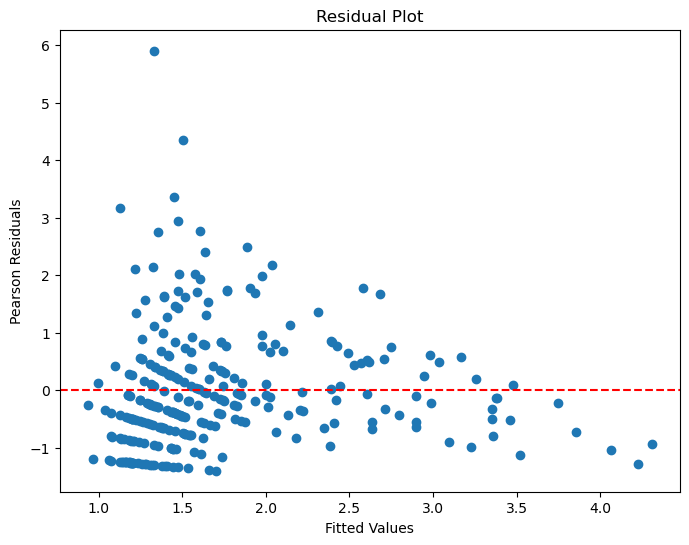

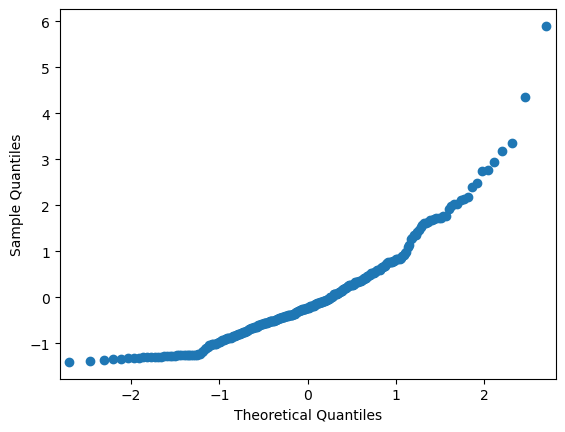

In [27]:
residuals = final_model.resid_pearson # Use pearson residuals for negative binomial

plt.figure(figsize=(8, 6))
plt.scatter(final_model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Fitted Values")
plt.ylabel("Pearson Residuals")
plt.title("Residual Plot")
plt.show()

fig = sm.qqplot(residuals)
plt.show()

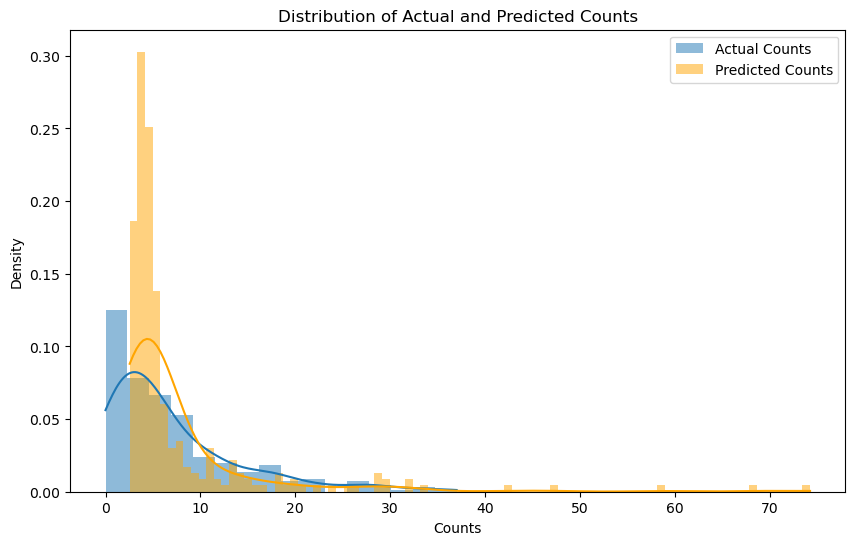

In [31]:
predictions = final_model.predict(X)

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, label="Actual Counts", stat="density", linewidth=0)
sns.histplot(predictions, kde=True, label="Predicted Counts", color='orange', stat="density", linewidth=0)
plt.xlabel("Counts")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Counts")
plt.legend()
plt.show()

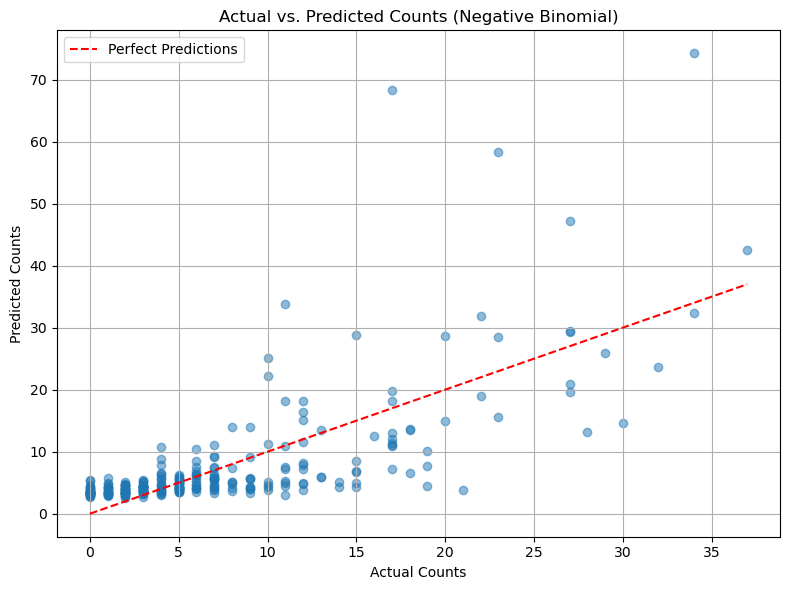

In [33]:
# Get predictions (predicted means)
predictions = final_model.predict(X)

# Create the plot using matplotlib
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(y, predictions, alpha=0.5)  # alpha controls point transparency

# Add a diagonal line for reference
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Predictions')

plt.xlabel("Actual Counts")
plt.ylabel("Predicted Counts")
plt.title("Actual vs. Predicted Counts (Negative Binomial)")
plt.legend()
plt.grid(True)
plt.tight_layout() # Adjusts plot to prevent labels from being cut off
plt.show()

# Feature Importance and Correlation Matrix and Multicollinearity Checking

In [ ]:
# import statsmodels.api as sm
# from statsmodels.genmod import families
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np
# import pandas as pd
# from scipy import stats

# n_splits = 10

# X = df[x_cols]
# y = df['2023_evict Count'] + 1

# X = sm.add_constant(X)

# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# def evaluate_tweedie(X, y, kf, var_power=1.5):  # Default var_power=1.5
#     rmse_scores = []
#     mse_scores = []
#     mae_scores = []
#     log_likelihoods = []
#     aic_scores = []
#     bic_scores = []

#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#         try:
#             model = sm.GLM(y_train, X_train, family=families.Tweedie(var_power=var_power)).fit(disp=False)
#             test_predictions = model.predict(X_test)

#             rmse_scores.append(np.sqrt(mean_squared_error(y_test, test_predictions)))
#             mse_scores.append(mean_squared_error(y_test, test_predictions))
#             mae_scores.append(mean_absolute_error(y_test, test_predictions))
#             log_likelihoods.append(model.llf)
#             aic_scores.append(model.aic)
#             bic_scores.append(model.bic)

#         except Exception as e:
#             print(f"Fold failed: {e}")
#             continue

#     return {
#         "rmse": np.mean(rmse_scores),
#         "mse": np.mean(mse_scores),
#         "mae": np.mean(mae_scores),
#         "log_likelihood": np.mean(log_likelihoods),
#         "aic": np.mean(aic_scores),
#         "bic": np.mean(bic_scores),
#     }

# tweedie_metrics = evaluate_tweedie(X, y, kf, var_power=1.5)

# print("\nTweedie Model Metrics:")
# for metric, value in tweedie_metrics.items():
#     print(f"Average Cross-Validated {metric.upper()}: {value}")

# final_tweedie_model = sm.GLM(y, X, family=families.Tweedie(var_power=1.5)).fit(disp=False)
# print(final_tweedie_model.summary())

In [81]:
coefficients = final_tweedie_model.params

print(coefficients)

const                                               1.230990
311 Housing Count                                   0.000811
Households Median income (dollars)                  0.077271
Total Units                                        -0.000003
Total Vacant Units                                  0.000117
Black or African American alone                     0.007603
American Indian and Alaska Native alone            -0.016341
Asian alone                                         0.006083
Native Hawaiian and Other Pacific Islander alone    0.030718
Some Other Race alone                               0.003997
Percent Below Poverty                              -0.000023
dtype: float64


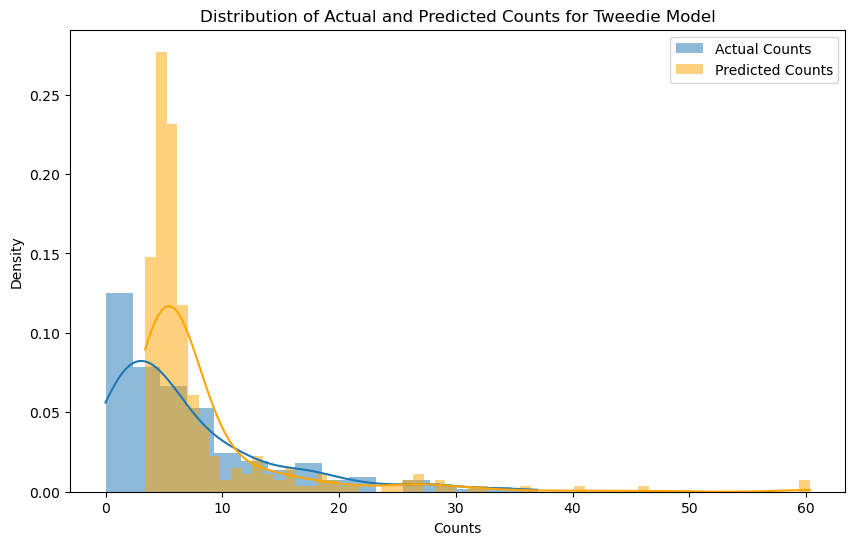

In [80]:
predictions = final_model.predict(X)

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, label="Actual Counts", stat="density", linewidth=0)
sns.histplot(predictions, kde=True, label="Predicted Counts", color='orange', stat="density", linewidth=0)
plt.xlabel("Counts")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Counts for Tweedie Model")
plt.legend()
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

test_vif = df[test_vif]
vif_data = pd.DataFrame()
vif_data["feature"] = test_vif.columns
vif_data["VIF"] = [variance_inflation_factor(test_vif.values, i) for i in range(test_vif.shape[1])]
print(vif_data)

                                             feature         VIF
0                                        White alone   29.021581
1                             Total Population Count    8.808611
2                                       Percent Male  104.444775
3                                     Percent Female  140.461485
4                                  311 Housing Count    1.064840
5                 Households Median income (dollars)    4.003664
6                                        Total Units   13.241398
7                                 Total Vacant Units    3.644886
8                    Black or African American alone   14.633140
9            American Indian and Alaska Native alone    2.084039
10                                       Asian alone    5.872301
11  Native Hawaiian and Other Pacific Islander alone    2.042519
12                             Some Other Race alone   11.877807
13                             Percent Below Poverty    2.854921


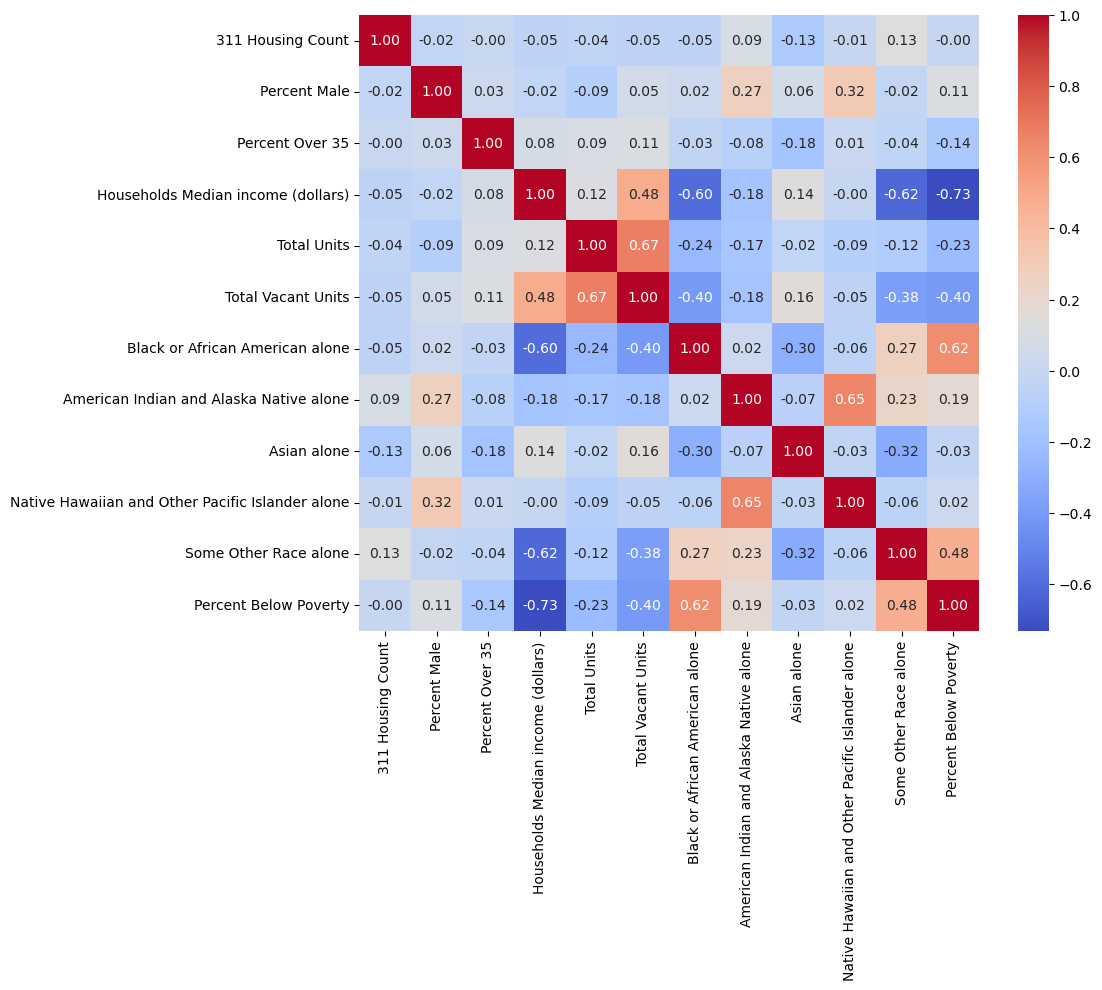

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[x_cols].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()